# Survival Analysis

This is a tool or set of connected tools and techniques that look at survival data. We look at subjects and see what happens to them over a certain time. In general we asked if they have survived upto a certain point. Survival does not have to be taken literally, it could be say a Netflix customer, and survival means that they have not (yet) abandoned their subsription. It could be a hotel booking that is not yet cancelled, or it could be literal survival in the case of, say, study cancer survival rates.

For each subject we have an observation, after t units of time this subject 'died'. Otherwise by the end of the study period the subject survived. This is the key problem of suvival analysis, in that for those that are still alive, we do not have knowledge of when they (will) die. This means we can't do the usual simple statistical tests on the data and must rely on something more sophisticated.

### Basic ideas

Let's take a look at the module that can do this in python. It's called `lifelines`

In [1]:
import lifelines as ll

Here is a sample dataset that is included with the package.

In [3]:
from lifelines.datasets import load_waltons
df = load_waltons()

In [4]:
df.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


How to interpret this dataset? It's about flies raised in the lab. There is one control group and one that has a certain gentic variant, this is indicated in 'group'.

T refers to the time in which the fly died, if E is 1.

If E is zero this is the last time at which the fly was seen alive. It has either not died, or for some reason we don't know (it escape for example, or was lost).

### Explore

Exploring some functionality, will write up some more conrete conclusions once I understand this better.

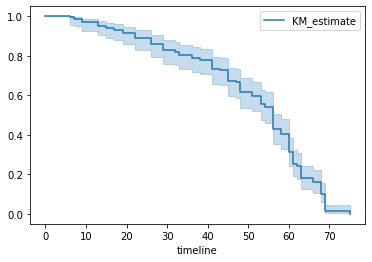

In [35]:
kmf = ll.KaplanMeierFitter()
kmf.fit(df['T'], event_observed=df['E'])
kmf.plot()

This gives us the probability of surviving for a given amount of time (I think in day probably). The time is relative to the birth of each fly (which is not the same day as they are born on different days). At time t=0 the survival is 1, everyone is alive to begin with by definition.

As each even occurs the survival function jumps dicretely downwards.

When a subject goes missing from the data they are not counted as dead, but they cease to be counted in the denominator.

This is a basic way in which to observe this kind of data.

Note that I'm looking at the population as a whole, and not yet splitting into the two groups.

Let's see if we truely understand this by trying to recreate it ourselves (at least the point estimate, don't use the error for now).

In [50]:
total = len(df)
total_known = total
total_dead = 0
ts = [0]
ps = [1]

previous = 1

df = df.sort_values('T')
for _, row in df.iterrows():
    E = row['E']
    time = row['T']
    


    ts.append(time)
    ps.append(previous)
    current = 1 - total_dead/total_known
    
    if E == 0:
        total_known -= 1
    else:
        total_dead += 1

    ts.append(time)
    ps.append(current)
    
    previous = current
    
    
        

In [51]:
import matplotlib.pyplot as plt

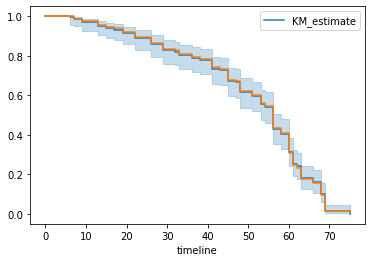

In [52]:
ax = kmf.plot()
ax.plot(ts, ps)

They look very similar, but they are not identical, I wonder what the difference is.

In [12]:
total

163

### What Should we still do

I want something presentable that I can share. It doesn't have to go into all the details, just needs to have a couple of worked examples.

Do some fake data with a classic case, and try the various techniques.

Use both the module and code it yourself.